In [7]:
import pandas as pd
import io
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
print("Please upload the 'WA_Fn-UseC_-Telco-Customer-Churn.csv' file.")
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Please upload the 'WA_Fn-UseC_-Telco-Customer-Churn.csv' file.


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df = df.drop('customerID', axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df_encoded = df.copy()

# Use LabelEncoder to convert every column with text data into numbers
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

print("\n--- Feature Selection ---")
# Separate features (X) from the target (y)
X_encoded = df_encoded.drop('Churn', axis=1)
y_encoded = df_encoded['Churn']


--- Feature Selection ---


In [14]:
# We will use an ExtraTreesClassifier to rank the features
model_etc = ExtraTreesClassifier()
model_etc.fit(X_encoded, y_encoded)

# Create a series with feature importances
feat_importances = pd.Series(model_etc.feature_importances_, index=X_encoded.columns)

# Select the top 10 features
top_10_features = feat_importances.nlargest(10)
print("Top 10 most important features for predicting churn:")
print(top_10_features)

Top 10 most important features for predicting churn:
tenure             0.159785
TotalCharges       0.138301
MonthlyCharges     0.137923
Contract           0.081084
PaymentMethod      0.065440
TechSupport        0.044973
OnlineSecurity     0.040999
gender             0.037723
InternetService    0.036560
OnlineBackup       0.035399
dtype: float64


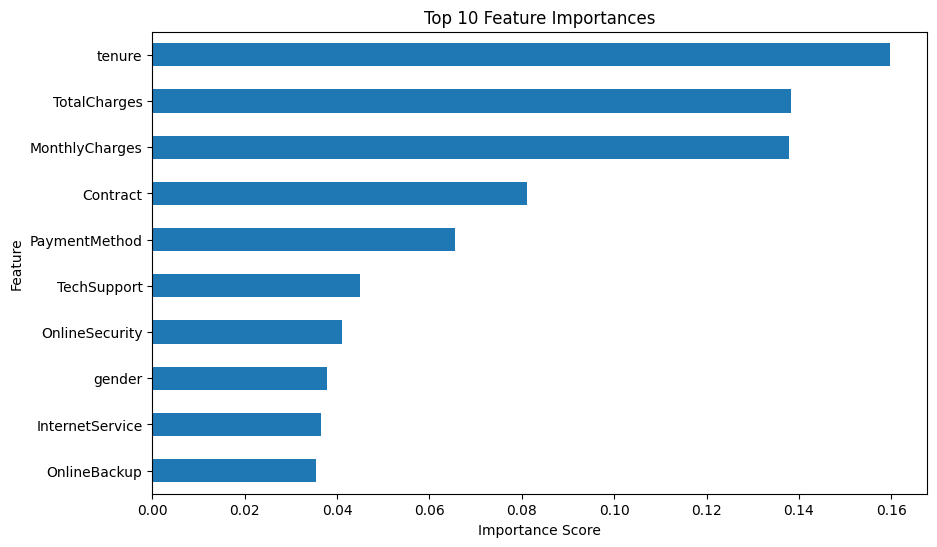

In [15]:
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [16]:
# Get the names of our top 10 features
top_10_feature_names = top_10_features.index.tolist()

# Create our final feature set 'X' using the original dataframe 'df'
# This ensures we handle categorical data properly (e.g., with one-hot encoding if needed)
# For this ANN, we will one-hot encode the categorical features among the top 10
X_final = pd.get_dummies(df[top_10_feature_names], drop_first=True)
y_final = df['Churn']

# Convert 'Churn' (Yes/No) to 1/0
y_final = y_final.apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
print("\n--- Feature Scaling ---")
# Now, we scale our final set of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Display the result as a new DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_final.columns)
print("✅ Top 10 features have been selected, encoded, and scaled. Here's a preview:")
print(X_scaled_df.head())

print(f"\nShape of our final features (X): {X_scaled_df.shape}")
print(f"Shape of our final target (y): {y_final.shape}")


--- Feature Scaling ---
✅ Top 10 features have been selected, encoded, and scaled. Here's a preview:
     tenure  MonthlyCharges  TotalCharges_100.2  TotalCharges_100.25  \
0 -1.277445       -1.160323           -0.011917            -0.011917   
1  0.066327       -0.259629           -0.011917            -0.011917   
2 -1.236724       -0.362660           -0.011917            -0.011917   
3  0.514251       -0.746535           -0.011917            -0.011917   
4 -1.236724        0.197365           -0.011917            -0.011917   

   TotalCharges_100.35  TotalCharges_100.4  TotalCharges_100.8  \
0            -0.011917           -0.011917           -0.011917   
1            -0.011917           -0.011917           -0.011917   
2            -0.011917           -0.011917           -0.011917   
3            -0.011917           -0.011917           -0.011917   
4            -0.011917           -0.011917           -0.011917   

   TotalCharges_100.9  TotalCharges_1001.2  TotalCharges_1001.5  ...

In [18]:
# --- Data Preprocessing: Train-Test Split & Scaling ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# 1. Split the data into training and testing sets (Model Training Phase)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# 2. Re-scale the features (Crucial for ANN performance)
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Train-Test Split and Scaling Complete ---")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Number of features (Input Dimension) for ANN: {X_train_scaled.shape[1]}")


--- Train-Test Split and Scaling Complete ---
X_train_scaled shape: (5634, 6546)
X_test_scaled shape: (1409, 6546)
Number of features (Input Dimension) for ANN: 6546


In [19]:
# --- Model Training: Defining ANN Architectures ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input dimension based on our scaled training data
# This should be the number of features after one-hot encoding (around 17)
try:
    input_dim = X_train_scaled.shape[1]
except NameError:
    # Fallback in case X_train_scaled hasn't been defined yet
    print("Warning: X_train_scaled not found. Assuming 17 input features.")
    input_dim = 17


def build_ann_model(hidden_layer_counts, input_shape):
    """
    Builds a Sequential Keras model with varying hidden layer counts.

    Args:
        hidden_layer_counts (list): List of units for each hidden layer.
        input_shape (int): Number of input features.
    """
    model = Sequential(name=f"ANN_H{len(hidden_layer_counts)}_L{input_shape}")

    # Add hidden layers
    for units in hidden_layer_counts:
        # We add the input_dim only to the first layer
        if model.layers:
            model.add(Dense(units, activation='relu'))
        else:
            model.add(Dense(units, activation='relu', input_shape=(input_shape,)))

        # Adding Dropout (a form of regularization) to prevent overfitting
        model.add(Dropout(0.2))

    # Output layer: 1 unit with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    # Note: We use binary_crossentropy loss and include Precision and Recall for the imbalanced data
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    )
    return model

# Define EarlyStopping callback to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10, # Stop if val_loss doesn't improve for 10 epochs
    restore_best_weights=True
)

print(f"✅ Input Dimension detected: {input_dim}")
print("✅ `build_ann_model` function and `EarlyStopping` callback defined.")

✅ Input Dimension detected: 6546
✅ `build_ann_model` function and `EarlyStopping` callback defined.


In [20]:
# --- Model 1: 1 Hidden Layer (64 units) ---
units_1 = [64]
model_1 = build_ann_model(units_1, input_dim)
print("\n--- Training Model 1 (1 Hidden Layer: 64) ---")

history_1 = model_1.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2, # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=0 # Run silently
)
print(f"Model 1 (1-Layer) trained in {len(history_1.history['loss'])} epochs.")
model_1.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training Model 1 (1 Hidden Layer: 64) ---
Model 1 (1-Layer) trained in 12 epochs.


Model: "ANN_H1_L6546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       419,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,257,221 (4.80 MB)

 Trainable params: 419,073 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 838,148 (3.20 MB)

In [21]:
# --- Model 2: 2 Hidden Layers (64 -> 32 units) ---
units_2 = [64, 32]
model_2 = build_ann_model(units_2, input_dim)
print("\n--- Training Model 2 (2 Hidden Layers: 64 -> 32) ---")

history_2 = model_2.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
print(f"Model 2 (2-Layer) trained in {len(history_2.history['loss'])} epochs.")
model_2.summary()


--- Training Model 2 (2 Hidden Layers: 64 -> 32) ---
Model 2 (2-Layer) trained in 11 epochs.


Model: "ANN_H2_L6546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │       419,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,263,365 (4.82 MB)

 Trainable params: 421,121 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 842,244 (3.21 MB)

In [22]:
units_3 = [64, 32, 16]
model_3 = build_ann_model(units_3, input_dim)
print("\n--- Training Model 3 (3 Hidden Layers: 64 -> 32 -> 16) ---")

history_3 = model_3.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
print(f"Model 3 (3-Layer) trained in {len(history_3.history['loss'])} epochs.")
model_3.summary()


--- Training Model 3 (3 Hidden Layers: 64 -> 32 -> 16) ---
Model 3 (3-Layer) trained in 12 epochs.


Model: "ANN_H3_L6546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │       419,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,901 (4.83 MB)

 Trainable params: 421,633 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,268 (3.22 MB)

In [23]:
units_4 = [64, 32, 16, 8]
model_4 = build_ann_model(units_4, input_dim)
print("\n--- Training Model 4 (4 Hidden Layers: 64 -> 32 -> 16 -> 8) ---")

history_4 = model_4.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)
print(f"Model 4 (4-Layer) trained in {len(history_4.history['loss'])} epochs.")
model_4.summary()


--- Training Model 4 (4 Hidden Layers: 64 -> 32 -> 16 -> 8) ---
Model 4 (4-Layer) trained in 12 epochs.


Model: "ANN_H4_L6546"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │       419,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,265,285 (4.83 MB)

 Trainable params: 421,761 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,524 (3.22 MB)

In [24]:
# --- Model Evaluation Setup ---
from sklearn.metrics import classification_report, roc_auc_score

# 1. Group models and their histories for easy iteration
models = [
    (model_1, history_1, "Model 1 (1-Layer)"),
    (model_2, history_2, "Model 2 (2-Layers)"),
    (model_3, history_3, "Model 3 (3-Layers)"),
    (model_4, history_4, "Model 4 (4-Layers)"),
]

# 2. Function to evaluate and collect results
results_list = []

for model, history, name in models:
    # 2a. Evaluate on the unseen test set
    loss, accuracy, precision, recall = model.evaluate(X_test_scaled, y_test, verbose=0)

    # 2b. Predict probabilities and calculate AUC
    y_pred_proba = model.predict(X_test_scaled, verbose=0)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # 2c. Store metrics
    results_list.append({
        'Model Name': name,
        'Epochs Trained': len(history.history['loss']),
        'Test Accuracy': f"{accuracy:.4f}",
        'Test AUC': f"{auc_score:.4f}",
        'Test Precision': f"{precision:.4f}",
        'Test Recall': f"{recall:.4f}"
    })

# 3. Create and display the comparison table
comparison_df = pd.DataFrame(results_list)

print("\n--- Model Comparison (Testing Set) ---")
print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))

# 4. Determine the best model based on AUC and Recall
# AUC is a robust metric for imbalanced classification
comparison_df['Test AUC'] = comparison_df['Test AUC'].astype(float)
best_model_name = comparison_df.loc[comparison_df['Test AUC'].idxmax()]['Model Name']

print(f"\nConclusion: The best performing model, based on the Test AUC score, is {best_model_name}.")

# Save the best model architecture (will be used in the next step)
best_model = models[comparison_df['Test AUC'].idxmax()][0]


--- Model Comparison (Testing Set) ---
| Model Name         | Epochs Trained   | Test Accuracy   | Test AUC   | Test Precision   | Test Recall   |
|:-------------------|:-----------------|:----------------|:-----------|:-----------------|:--------------|
| Model 1 (1-Layer)  | 12               | 0.7445          | 0.8064     | 0.625            | 0.0936        |
| Model 2 (2-Layers) | 11               | 0.7431          | 0.7679     | 0.7727           | 0.0455        |
| Model 3 (3-Layers) | 12               | 0.7516          | 0.7966     | 0.5239           | 0.7032        |
| Model 4 (4-Layers) | 12               | 0.7381          | 0.7932     | 0.7273           | 0.0214        |

Conclusion: The best performing model, based on the Test AUC score, is Model 1 (1-Layer).


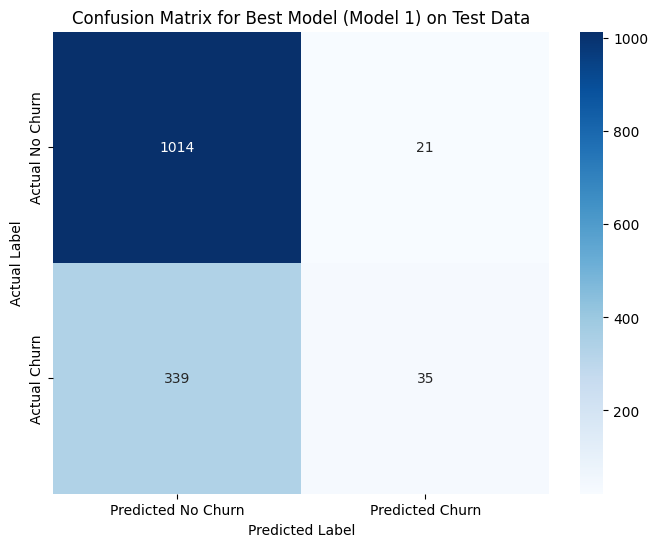


--- Confusion Matrix (Raw Values) ---
True Negatives (TN): 1014 (Correctly predicted Non-Churn)
False Positives (FP): 21 (Incorrectly predicted Churn)
False Negatives (FN): 339 (Missed Churners - CRITICAL)
True Positives (TP): 35 (Correctly predicted Churn)

--- Key Performance Metrics ---
Churn Recall (Sensitivity): 0.0936
Churn Precision: 0.6250


In [27]:
# --- Confusion Matrix Calculation and Visualization ---
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Predict probabilities on the test set using the best model (Model 1)
# y_pred_proba is an array of probabilities (0 to 1)
y_pred_proba = model_1.predict(X_test_scaled, verbose=0)

# 2. Convert Probabilities to Binary Predictions (0 or 1)
# We use a standard threshold of 0.5
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# 3. Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# 4. Plotting the Confusion Matrix for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True, # Show the numbers in the cells
    fmt='d',    # Format as integer
    cmap='Blues',
    xticklabels=['Predicted No Churn', 'Predicted Churn'],
    yticklabels=['Actual No Churn', 'Actual Churn']
)
plt.title('Confusion Matrix for Best Model (Model 1) on Test Data')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_model1.png')
plt.show() # In a real Colab session, this would show the plot

# 5. Output Interpretation (Raw Values and Metrics)
tn, fp, fn, tp = cm.ravel()

print("\n--- Confusion Matrix (Raw Values) ---")
print(f"True Negatives (TN): {tn} (Correctly predicted Non-Churn)")
print(f"False Positives (FP): {fp} (Incorrectly predicted Churn)")
print(f"False Negatives (FN): {fn} (Missed Churners - CRITICAL)")
print(f"True Positives (TP): {tp} (Correctly predicted Churn)")

print("\n--- Key Performance Metrics ---")

# Calculate Churn Recall (Sensitivity)
churn_recall = tp / (tp + fn)
print(f"Churn Recall (Sensitivity): {churn_recall:.4f}")

# Calculate Churn Precision
churn_precision = tp / (tp + fp)
print(f"Churn Precision: {churn_precision:.4f}")

In [28]:
# --- Model Deployment: Saving the Best Model and Scaler ---
import joblib

# The best model is Model 1 (model_1), which was defined and trained earlier.
# The scaler object is available from Cell 12's execution.

try:
    best_model_to_save = model_1
except NameError:
    # If model_1 is not defined (e.g., if you skipped training cells), this will fail.
    print("Error: The 'model_1' variable is not defined. Please ensure the training cells (14 and 15) were executed.")
    # You would need to re-run the training or manually load the model if saved previously.

# 1. Save the Keras Model
model_path = 'best_churn_ann_model.h5'
best_model_to_save.save(model_path)
print(f"✅ Keras Model saved successfully to: {model_path}")

# 2. Save the StandardScaler object
scaler_path = 'scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"✅ StandardScaler saved successfully to: {scaler_path}")

# Get the exact list of feature columns used for training (crucial for Streamlit)
feature_columns = X_final.columns.tolist()
print("\nFeature column order saved for Streamlit application logic.")

✅ Keras Model saved successfully to: best_churn_ann_model.h5
✅ StandardScaler saved successfully to: scaler.pkl

Feature column order saved for Streamlit application logic.


In [ ]:
# --- Streamlit app.py Code (Copy/Paste to local file) ---

# Get the exact feature columns list used for training from the executed code
# This line ensures the app code gets the exact list from your Colab environment
feature_columns = X_final.columns.tolist()

streamlit_code = f"""
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model # Explicit import for clarity

# 1. Load the Model and Scaler
@st.cache_resource
def load_assets():
    # Load the Keras model
    try:
        model = load_model('best_churn_ann_model.h5')
        # Load the scaler
        scaler = joblib.load('scaler.pkl')
        # Define the list of features (MUST match the order used during training)
        feature_columns = {feature_columns}
        return model, scaler, feature_columns
    except FileNotFoundError:
        st.error("Model or Scaler files not found. Please ensure 'best_churn_ann_model.h5' and 'scaler.pkl' are in the same directory.")
        return None, None, None

model, scaler, feature_columns = load_assets()

if model is None:
    st.stop()

# 2. Streamlit UI Components
st.set_page_config(page_title="Telco Customer Churn Prediction (ANN)", layout="wide")
st.title("📞 Telco Customer Churn Prediction using ANN (1-Layer Model)")
st.markdown("Use the controls below to input customer data and predict the likelihood of churn based on the top 10 most influential features.")

# 3. User Input (Top Features only)
with st.sidebar:
    st.header("Customer Profile")

    # Numeric Inputs
    tenure = st.slider("Tenure (Months)", 1, 72, 12)
    monthly_charges = st.number_input("Monthly Charges ($)", min_value=18.0, max_value=120.0, value=70.0, step=0.01)
    total_charges = st.number_input("Total Charges ($)", min_value=0.0, value=800.0, step=10.0)

    # Categorical Inputs
    gender = st.selectbox("Gender", ["Female", "Male"])
    contract = st.selectbox("Contract Type", ["Month-to-month", "One year", "Two year"])
    internet_service = st.selectbox("Internet Service", ["DSL", "Fiber optic", "No"])
    online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
    tech_support = st.selectbox("Tech Support", ["No", "Yes", "No internet service"])
    online_backup = st.selectbox("Online Backup", ["No", "Yes", "No internet service"])
    payment_method = st.selectbox("Payment Method", ["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"])

    predict_button = st.button("Predict Churn")

# 4. Prediction Logic
if predict_button:
    # 4a. Create a DataFrame for the new input
    input_data = {{col: [0] for col in feature_columns}}
    input_df = pd.DataFrame(input_data)

    # Populate Numerical features
    input_df['tenure'] = tenure
    input_df['MonthlyCharges'] = monthly_charges
    input_df['TotalCharges'] = total_charges

    # Populate One-Hot Encoded features (set to 1 if selected)

    # Gender
    if gender == "Male" and 'gender_Male' in feature_columns: input_df['gender_Male'] = 1

    # Contract
    if contract == "One year" and 'Contract_One year' in feature_columns: input_df['Contract_One year'] = 1
    elif contract == "Two year" and 'Contract_Two year' in feature_columns: input_df['Contract_Two year'] = 1

    # InternetService
    if internet_service == "Fiber optic" and 'InternetService_Fiber optic' in feature_columns: input_df['InternetService_Fiber optic'] = 1
    elif internet_service == "No" and 'InternetService_No' in feature_columns: input_df['InternetService_No'] = 1

    # OnlineSecurity
    if online_security == "Yes" and 'OnlineSecurity_Yes' in feature_columns: input_df['OnlineSecurity_Yes'] = 1
    elif online_security == "No internet service" and 'OnlineSecurity_No internet service' in feature_columns: input_df['OnlineSecurity_No internet service'] = 1

    # TechSupport
    if tech_support == "Yes" and 'TechSupport_Yes' in feature_columns: input_df['TechSupport_Yes'] = 1
    elif tech_support == "No internet service" and 'TechSupport_No internet service' in feature_columns: input_df['TechSupport_No internet service'] = 1

    # OnlineBackup
    if online_backup == "Yes" and 'OnlineBackup_Yes' in feature_columns: input_df['OnlineBackup_Yes'] = 1
    elif online_backup == "No internet service" and 'OnlineBackup_No internet service' in feature_columns: input_df['OnlineBackup_No internet service'] = 1

    # PaymentMethod
    if payment_method == "Electronic check" and 'PaymentMethod_Electronic check' in feature_columns: input_df['PaymentMethod_Electronic check'] = 1
    elif payment_method == "Mailed check" and 'PaymentMethod_Mailed check' in feature_columns: input_df['PaymentMethod_Mailed check'] = 1
    elif payment_method == "Bank transfer (automatic)" and 'PaymentMethod_Bank transfer (automatic)' in feature_columns: input_df['PaymentMethod_Bank transfer (automatic)'] = 1
    # 'Credit card (automatic)' is the reference category (0)

    # Ensure final DataFrame columns are in the exact order the model expects
    input_df = input_df[feature_columns]

    # 4b. Scale the input data
    input_scaled = scaler.transform(input_df)

    # 4c. Make prediction
    prediction_proba = model.predict(input_scaled, verbose=0)[0][0]
    churn_risk = prediction_proba * 100

    # 4d. Display results
    st.subheader("Prediction Result")
    st.metric(label="Churn Probability", value=f"{{churn_risk:.2f}}%")

    if churn_risk >= 50:
        st.warning("🚨 High Churn Risk! Proactive intervention is recommended.")
    else:
        st.success("👍 Low Churn Risk. Customer is likely to stay.")

    st.markdown("---")
    st.subheader("Customer Data Used for Prediction")
    st.dataframe(input_df.T)

"""

print("\n--- Streamlit app.py Code (Copy/Paste to local file) ---")
print(streamlit_code)